## diffraction patterns

In [1]:
import gsd
import gsd.hoomd
import freud
import numpy as np 
import signac
import matplotlib.pyplot as plt

### ptb7

chemical formula: ($C_{41}H_{53}FO_{4}S_{4})_{n}$

<img src="https://cdn.shopify.com/s/files/1/0823/0287/files/PTB7-structure.png" alt="Drawing" style="width: 200px;"/>

In [42]:
total_atoms = 41+53+1+4+4
print(total_atoms)
# we're doing united atom--so our total atoms is 
total_atoms-=53
# from ignoring the H
print(total_atoms)

103
50


In [44]:
data_path = "/home/emilyepstein/projects/ptb7-itic/ptb7-project/workspace/"

project = signac.get_project(data_path)

In [28]:
state_dict = {#"molecule": "PTB7_10mer_smiles",
              "size":"medium", 
              "process":"quench", 
              "density": 0.9, 
              "kT_reduced": 1.7}

job_list = project.find_jobs(state_dict)
    
for job in job_list:
    job_path = job.fn("trajectory.gsd")
    print(job)

639f334452ca975a425617708f6b2c39
fe36ee4052a01cae041ef5988477de10
f082f27bfe6890e697a969d934b678f0


In [29]:
# taking the last frame for a snapshot

with gsd.hoomd.open(name=job_path, mode='rb') as t:
    snap = t[-1]

In [46]:
# atom types in our system

print(snap.particles.types)

['cc', 'cd', 'ca', 'os', 'c3', 'ss', 'c', 'o', 'f']


In [31]:
# here is the list of particles by typeid 
# e.g. ["cc", "cd", "cc"] --> [0,1,0]

print(len(snap.particles.typeid))
print(len(snap.particles.typeid)/(total_atoms*10))
print(snap.particles.typeid)

100000
200.0
[0 1 2 ... 4 2 5]


In [47]:
# chose the atomtype from the list snap.particles.types 
# for example the typeid for cc is 0, and f is 8 

atomtype = "f"
points = snap.particles.position[
    snap.particles.typeid == snap.particles.types.index(atomtype)]

In [33]:
# checking the shape of the array

print(points.shape)

# we should have 1000 "f"s for 5mer, 2000 for a 10mer, 3000 for 15mer
# 3 columns, x,y,z coordinates for position


(2000, 3)


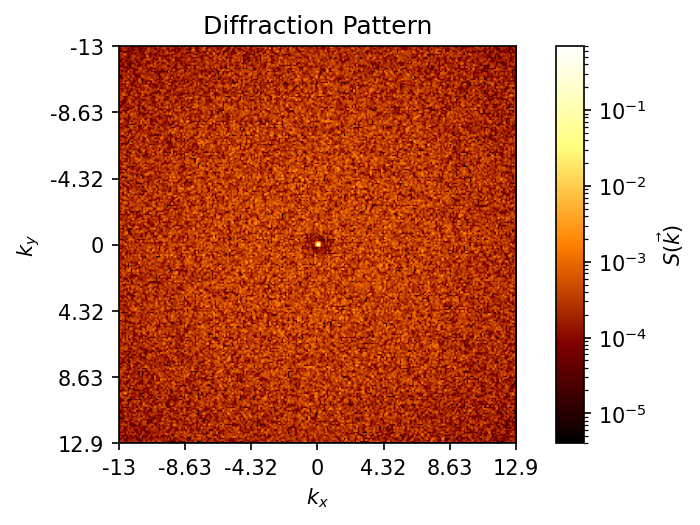

In [48]:
# creates and shows the dp, function for job_list below

box = freud.Box.from_box(snap.configuration.box)

dp = freud.diffraction.DiffractionPattern(grid_size=1024, output_size=1024)

fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
dp.compute((box, points), view_orientation=[1, 0, 0, 0])
dp.plot(ax)
plt.show()

In [49]:
def make_dp(job_list):
    for job in job_list:
        box = freud.Box.from_box(snap.configuration.box)

        dp = freud.diffraction.DiffractionPattern(grid_size=1024, output_size=1024)

        fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
        dp.compute((box, points), view_orientation=[1, 0, 0, 0])
        dp.plot(ax)
        plt.show()



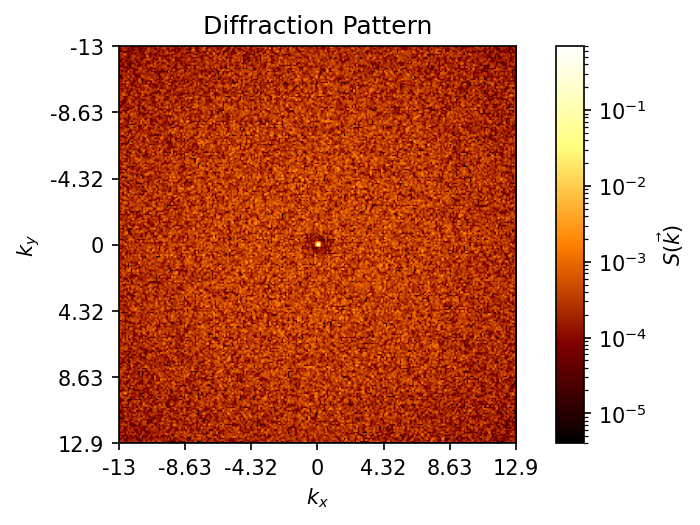

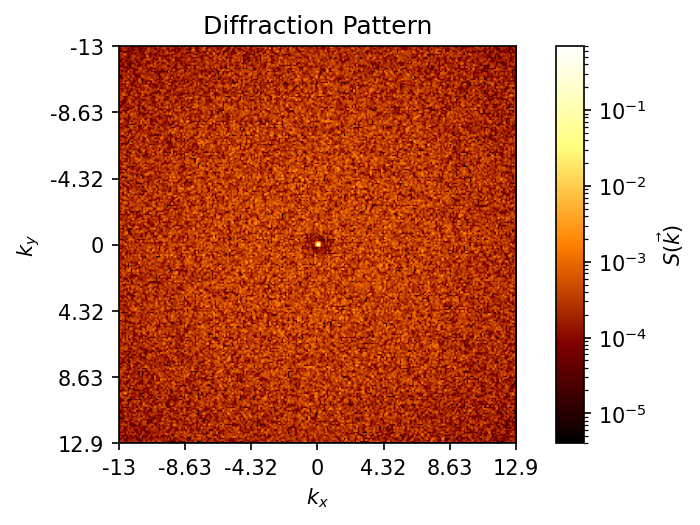

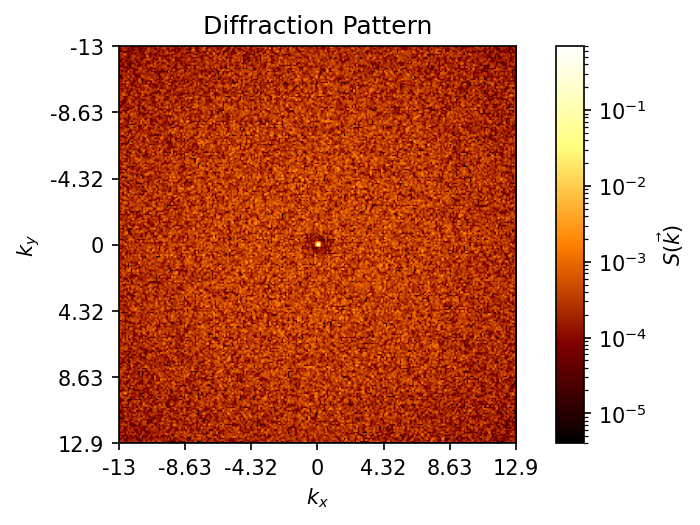

In [50]:
make_dp(job_list)